#### Line plot

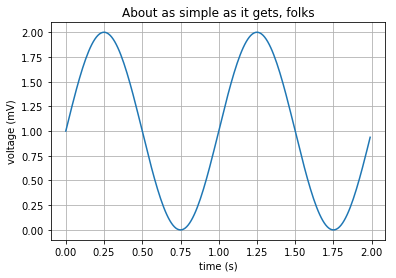

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(0.0,2.0,0.01)
s = 1  + np.sin(2 * np.pi * t)

# Note that using plt.subplots below is equivalent to using
# fig = plt.figure() ax = fig.add_subplot(111)
fig, ax = plt.subplots()
ax.plot(t,s)
ax.set(xlabel = 'time (s)',ylabel = 'voltage (mV)',
      title = "About as simple as it gets, folks")

ax.grid()
fig.savefig("test.png")
plt.show()

### Multiple subplots in on figure

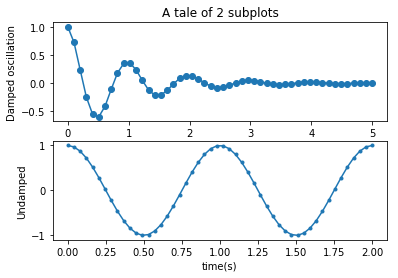

In [67]:
x1 = np.linspace(0.0,5.0)
x2 = np.linspace(0.0,2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2*np.pi * x2)

plt.subplot(2,1,1)
plt.plot(x1,y1,'o-')

plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2,1,2)
plt.plot(x2,y2,'.-')
plt.xlabel('time(s)')
plt.ylabel('Undamped')

plt.show()



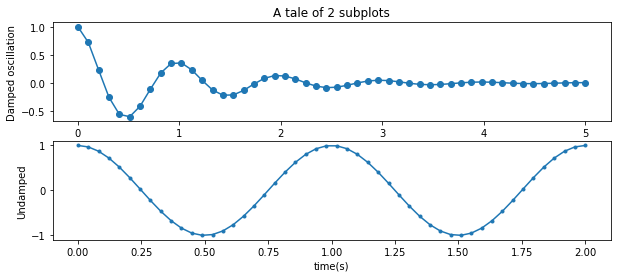

In [79]:
#################

fig, axs = plt.subplots(2,1,figsize=(10,4))
axs[0].plot(x1,y1,'o-')
axs[0].set(title= 'A tale of 2 subplots',ylabel='Damped oscillation')

axs[1].plot(x2,y2,'.-')
axs[1].set(xlabel='time(s)',ylabel='Undamped')
plt.show()

### Image demo

In [87]:
from __future__ import print_function

import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook




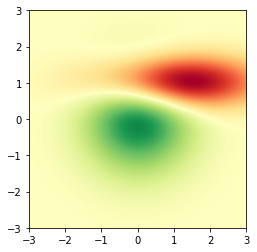

In [17]:
delta = 0.025
x = y = np.arange(-3.0,3.0,delta)
X, Y = np.meshgrid(x,y)
Z1 = mlab.bivariate_normal(X,Y,1.0,1.0,0,0.0)
Z2 = mlab.bivariate_normal(X,Y, 1.5,0.5,1,1)

Z = Z1- Z2

im = plt.imshow(Z, interpolation = 'bilinear', cmap = cm.RdYlGn,
               origin = 'lower',extent = [-3,3,-3,3],
                vmax = abs(Z).max(), vmin = -abs(Z).max())
plt.show()


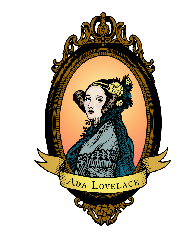

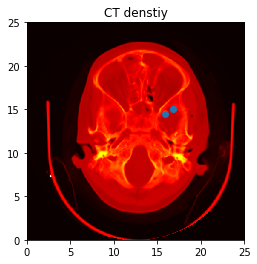

In [33]:
# A sample image

with cbook.get_sample_data('ada.png') as image_file:
    image = plt.imread(image_file)

fig, ax = plt.subplots()
ax.imshow(image)
ax.axis('off')
plt.show()

# And another sample

w, h = 512, 512
with cbook.get_sample_data('ct.raw.gz', asfileobj=True) as datafile:
    s = datafile.read()

A = np.fromstring(s, np.uint16).astype(float).reshape((w,h))
A /= A.max()

fig, ax = plt.subplots()

im = ax.imshow(A, cmap = plt.cm.hot, origin = 'upper',extent =(0,25,0,25))
markers = [(15.9,14.5),(16.8,15)]
x,y = zip(*markers)
ax.plot(x,y,'o')

ax.set_title('CT denstiy')
plt.show()
    

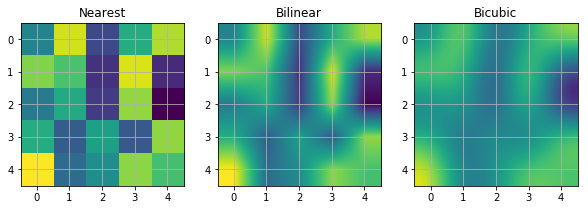

In [44]:
A = np.random.rand(5,5)
fig, axs = plt.subplots(1,3,figsize=(10,3))
for ax, interp in zip(axs, ['nearest','bilinear','bicubic']):
    ax.imshow(A, interpolation = interp)
    ax.set_title(interp.capitalize())
    ax.grid(True)
plt.show()


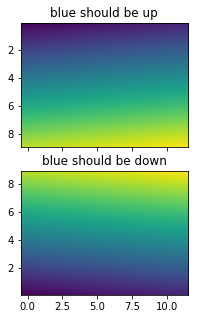

In [80]:
x = np.arange(120).reshape((10, 12))

interp = 'bilinear'
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(3, 5))
axs[0].set_title('blue should be up')
axs[0].imshow(x, origin='upper', interpolation=interp)

axs[1].set_title('blue should be down')
axs[1].imshow(x, origin='lower', interpolation=interp)
plt.show()

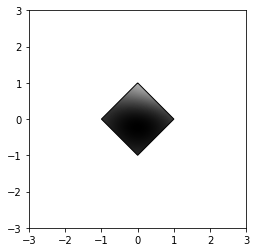

In [94]:

from matplotlib.path import  Path
from matplotlib.patches import PathPatch

delta = 0.025
x = y = np.arange(-3.0,3.0,delta)
X, Y = np.meshgrid(x,y)
Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
Z = Z2 - Z1  # difference of Gaussians

path = Path([[0, 1],[1, 0],[0, -1],[-1, 0],[0, 1]])
patch = PathPatch(path, facecolor = 'none')
fig, ax = plt.subplots()

ax.add_patch(patch)

im = ax.imshow(Z, interpolation ='bilinear',cmap = cm.gray,
              origin  = 'lower',extent = [-3,3,-3,3],
              clip_path = patch, clip_on = True)
plt.show()









### pcolormesh

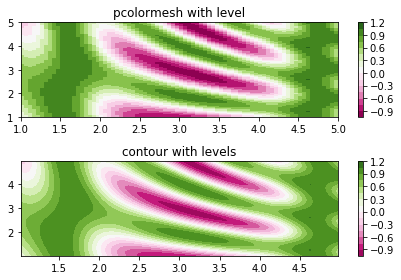

In [108]:
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np

# make these smaller to increase the resolution

dx, dy = 0.05, 0.05
y, x = np.mgrid[slice(1, 5 + dy, dy),slice(1, 5 + dx, dx)]

z = np.sin(x)**10 + np.cos(10 + y* x) * np.cos(x)
z = z[:-1,:-1]

levels = MaxNLocator(nbins = 15).tick_values(z.min(), z.max())
cmap = plt.get_cmap('PiYG')
norm = BoundaryNorm(levels, ncolors = cmap.N, clip = True)

fig, (ax0,ax1) = plt.subplots(nrows = 2)

im = ax0.pcolormesh(x,y,z,cmap = cmap, norm = norm)
fig.colorbar(im , ax = ax0)
ax0. set_title('pcolormesh with level')

cf = ax1.contourf(x[:-1,:-1] + dx/2. , 
                y[:-1,:-1] + dy/2., z , levels = levels, cmap = cmap)

fig.colorbar(cf, ax = ax1)
ax1.set_title('contour with levels')

fig.tight_layout()
plt.show()



### Histogram


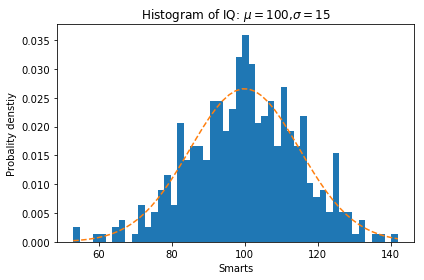

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

np.random.seed(19680801)

mu = 100
sigma = 15
x = mu + sigma * np.random.randn(437)

num_bins = 50
fig, ax = plt.subplots()

n, bins, patches = ax.hist(x, num_bins, normed = 1)

y = mlab.normpdf(bins, mu, sigma)
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probality denstiy')
ax.set_title(r'Histogram of IQ: $\mu=100$,$\sigma= 15$')

fig.tight_layout()
plt.show()





### subplots

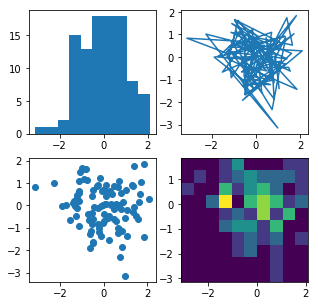

In [112]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)
data = np.random.randn(2, 100)

fig, axs = plt.subplots(2, 2, figsize=(5, 5))
axs[0, 0].hist(data[0])
axs[1, 0].scatter(data[0], data[1])
axs[0, 1].plot(data[0], data[1])
axs[1, 1].hist2d(data[0], data[1])

plt.show()

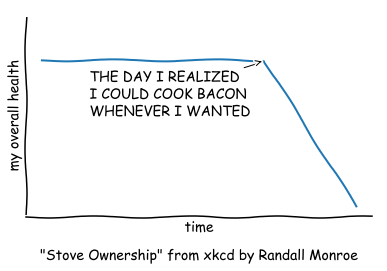

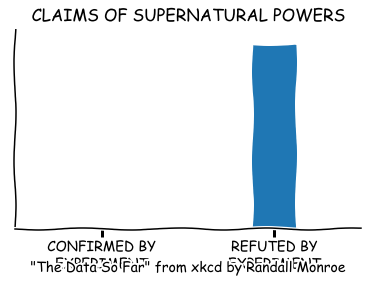

In [114]:
import matplotlib.pyplot as plt
import numpy as np

with plt.xkcd():
    # Based on "Stove Ownership" from XKCD by Randall Monroe
    # http://xkcd.com/418/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    plt.xticks([])
    plt.yticks([])
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)

    plt.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

    plt.plot(data)

    plt.xlabel('time')
    plt.ylabel('my overall health')
    fig.text(
        0.5, 0.05,
        '"Stove Ownership" from xkcd by Randall Monroe',
        ha='center')

    # Based on "The Data So Far" from XKCD by Randall Monroe
    # http://xkcd.com/373/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.bar([0, 1], [0, 100], 0.25)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks([0, 1])
    ax.set_xlim([-0.5, 1.5])
    ax.set_ylim([0, 110])
    ax.set_xticklabels(['CONFIRMED BY\nEXPERIMENT', 'REFUTED BY\nEXPERIMENT'])
    plt.yticks([])

    plt.title("CLAIMS OF SUPERNATURAL POWERS")

    fig.text(
        0.5, 0.05,
        '"The Data So Far" from xkcd by Randall Monroe',
        ha='center')

plt.show()

### Legend using pre-defined labels


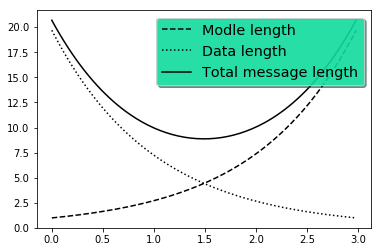

In [131]:
import numpy as np
import matplotlib.pyplot as plt

a = b = np.arange(0,3,0.02)
c = np.exp(a)
d = c[::-1]

fig, ax = plt.subplots()
ax.plot(a,c,'k--', label = 'Modle length')
ax.plot(a,d,'k:', label = 'Data length')
ax.plot(a,c+d, 'k', label = 'Total message length')

legend = ax.legend(loc ='upper right', shadow = True, fontsize = 'x-large')

legend.get_frame().set_facecolor('#11EEAA')
plt.show()




### Scatter plot